In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



In [5]:
# Crear un dataset de ejemplo
np.random.seed(0)
data = {
 'A': np.random.randn(100),
 'B': np.random.rand(100) * 100,
 'C': np.random.randint(1, 100, 100),
 'D': np.random.choice([np.nan, 1, 2, 3], 100)
}

df = pd.DataFrame(data)

# Mostrar las primeras filas del dataset
print("Primeras filas del dataset:")
print(df.head())


Primeras filas del dataset:
          A          B   C    D
0  1.764052  42.385505  82  2.0
1  0.400157  60.639321  56  2.0
2  0.978738   1.919320  65  3.0
3  2.240893  30.157482  76  1.0
4  1.867558  66.017354  93  1.0


In [6]:
# Encontrar valores nulos
print("\nValores nulos en el dataset:")
print(df.isnull().sum())



Valores nulos en el dataset:
A     0
B     0
C     0
D    30
dtype: int64


In [7]:
# Llenar valores faltantes
df['D'].fillna(df['D'].mean(), inplace=True)


In [8]:
# Encontrar valores nulos
print("\nValores nulos en el dataset:")
print(df.isnull().sum())



Valores nulos en el dataset:
A    0
B    0
C    0
D    0
dtype: int64


In [9]:
# Encontrar y mostrar outliers
def find_outliers(column):
 Q1 = column.quantile(0.25)
 Q3 = column.quantile(0.75)
 IQR = Q3 - Q1
 outliers = column[(column < (Q1 - 1.5 * IQR)) | (column > (Q3 + 1.5 * IQR))]
 return outliers

outliers_A = find_outliers(df['A'])
outliers_B = find_outliers(df['B'])
outliers_C = find_outliers(df['C'])

print("\nOutliers en la columna A:")
print(outliers_A)
print("Outliers en la columna B:")
print(outliers_B)
print("Outliers en la columna C:")
print(outliers_C)



Outliers en la columna A:
Series([], Name: A, dtype: float64)
Outliers en la columna B:
Series([], Name: B, dtype: float64)
Outliers en la columna C:
Series([], Name: C, dtype: int32)


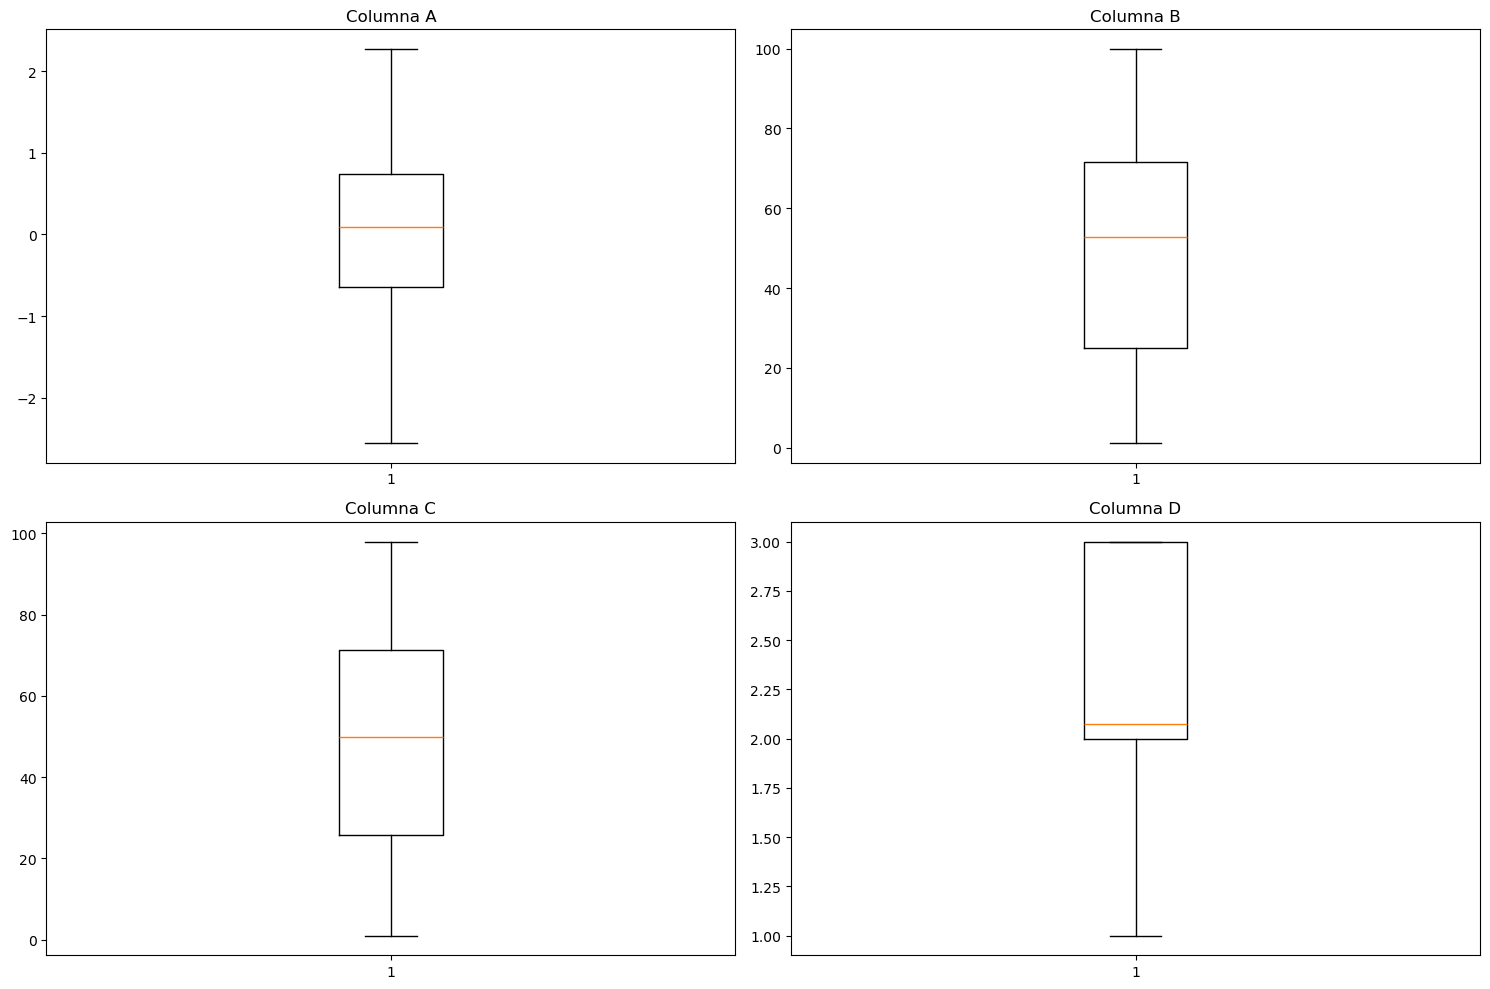

In [10]:

# Visualización de outliers
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.boxplot(df['A'])
plt.title('Columna A')

plt.subplot(2, 2, 2)
plt.boxplot(df['B'])
plt.title('Columna B')

plt.subplot(2, 2, 3)
plt.boxplot(df['C'])
plt.title('Columna C')

plt.subplot(2, 2, 4)
plt.boxplot(df['D'])
plt.title('Columna D')

plt.tight_layout()
plt.show()


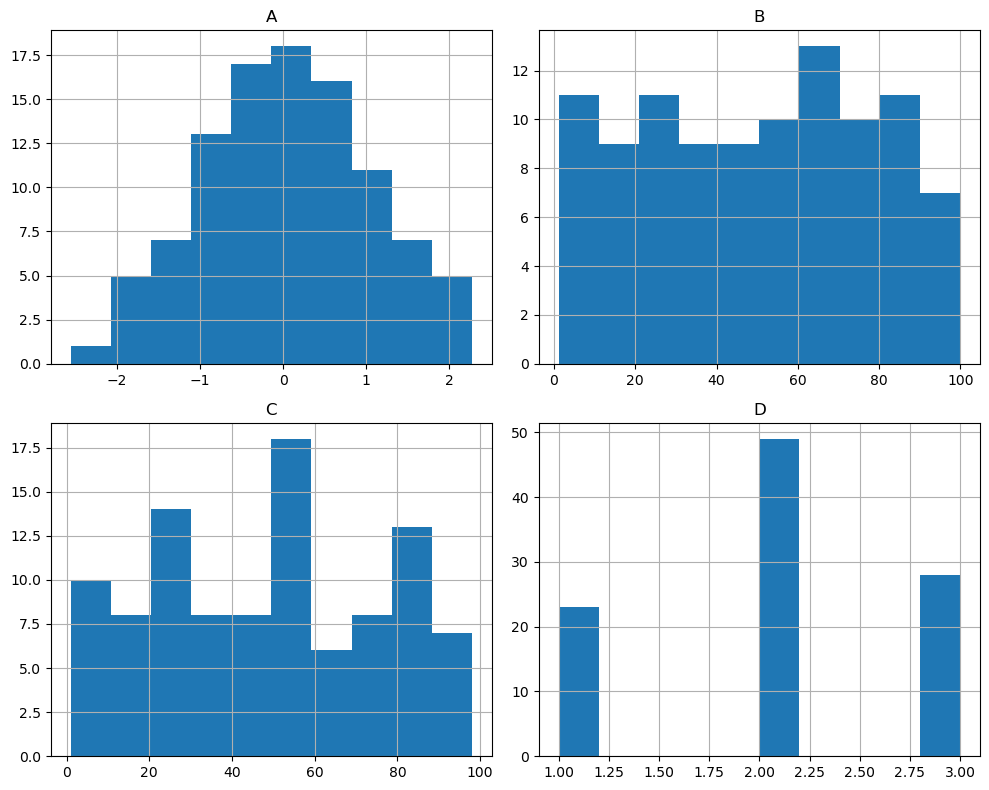

In [11]:
# Histograma para visualizar la distribución de los datos
df.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()


In [12]:
# Data wrangling: pivoteo y agrupamiento
df_pivot = df.pivot_table(values='B', index='C', columns='D', aggfunc='mean')
df_grouped = df.groupby('D').agg({'A': 'mean', 'B': 'sum', 'C': 'max'})


In [13]:
# Mostrar resultados de pivoteo y agrupamiento
print("\nTabla pivoteada:")
print(df_pivot.head())

print("\nDatos agrupados:")
print(df_grouped)



Tabla pivoteada:
D  1.000000   2.000000   2.071429   3.000000
C                                           
1       NaN        NaN  10.022689        NaN
5       NaN  16.249293        NaN  89.667129
6       NaN        NaN  70.388858        NaN
7       NaN        NaN        NaN   5.802916
8       NaN  36.756187  18.619301        NaN

Datos agrupados:
                 A            B   C
D                                  
1.000000  0.041589  1036.789787  95
2.000000  0.073652   946.238467  84
2.071429 -0.115891  1618.107369  98
3.000000  0.253628  1345.502553  93


In [14]:
# Exportar a Excel y CSV
df.to_excel('dataset.xlsx', index=False)
df.to_csv('dataset.csv', index=False)

print("\nEl dataset ha sido exportado a 'dataset.xlsx' y 'dataset.csv'.")



El dataset ha sido exportado a 'dataset.xlsx' y 'dataset.csv'.
